In [1]:
import numpy as np
import pandas as pd

In [2]:
crop = pd.read_csv('crop_production.csv')

In [3]:
crop.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN


In [4]:
crop.shape

(20566, 9)

In [5]:
crop.isnull().sum()

index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64

In [6]:
crop['Flag Codes'].unique()

array([nan])

In [7]:
crop['LOCATION'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'IND', 'IDN', 'IRN', 'KAZ', 'MYS', 'MOZ', 'NGA', 'PAK', 'PRY',
       'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA', 'THA', 'UKR',
       'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS', 'NOR', 'CHE',
       'EU28', 'ISR', 'HTI'], dtype=object)

In [8]:
crop['SUBJECT'].unique()

array(['RICE', 'WHEAT', 'MAIZE', 'SOYBEAN'], dtype=object)

In [9]:
crop['SUBJECT'].describe()

count     20566
unique        4
top       MAIZE
freq       5151
Name: SUBJECT, dtype: object

In [10]:
crop['FREQUENCY'].unique()

array(['A'], dtype=object)

In [11]:
crop['INDICATOR'].unique()

array(['CROPYIELD'], dtype=object)

In [12]:
crop['MEASURE'].unique()

array(['TONNE_HA', 'THND_TONNE', 'THND_HA'], dtype=object)

In [13]:
crop['Value'].describe()

count    2.056600e+04
mean     1.249281e+04
std      5.960529e+04
min      0.000000e+00
25%      1.961877e+00
50%      2.560970e+01
75%      1.563000e+03
max      1.146044e+06
Name: Value, dtype: float64

In [14]:
new_df = crop[['LOCATION','INDICATOR','SUBJECT','MEASURE','FREQUENCY','TIME','Value']]

In [15]:
new_df=new_df.rename(columns ={'LOCATION':'location','INDICATOR':'indicator','SUBJECT':'crop_type','MEASURE':'measure','FREQUENCY':'frequency','TIME':'time','Value':'value'})

In [16]:
new_df.describe()

,time,value
count,20566.000000,2.056600e+04
mean,2007.591170,1.249281e+04
std,10.369489,5.960529e+04
min,1970.000000,0.000000e+00
25%,1999.000000,1.961877e+00
50%,2008.000000,2.560970e+01
75%,2017.000000,1.563000e+03
max,2025.000000,1.146044e+06


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
new_df.head()

,location,indicator,crop_type,measure,frequency,time,value
0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607
1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737
2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340
3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000
4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815


C:\Users\Pooja Khande\anaconda3\envs\Data science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value', ylabel='time'>

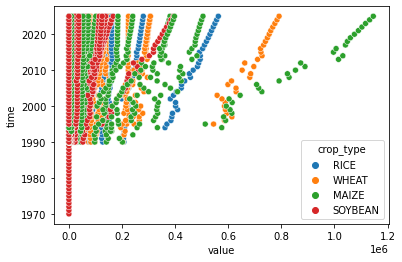

In [19]:
sns.scatterplot(new_df['value'],new_df['time'],hue=new_df['crop_type'])

<AxesSubplot:xlabel='crop_type', ylabel='location'>

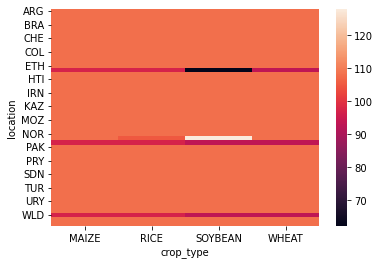

In [20]:
sns.heatmap(pd.crosstab(new_df['location'],new_df['crop_type']))

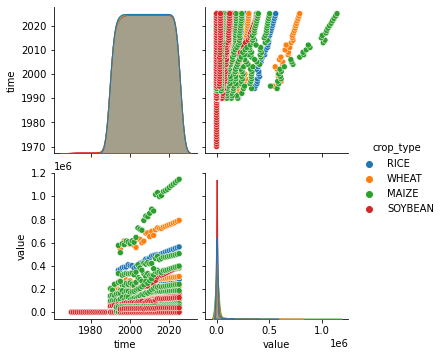

In [21]:
sns.pairplot(new_df,hue='crop_type')

<AxesSubplot:ylabel='crop_type'>

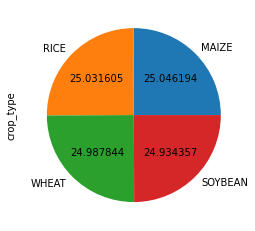

In [22]:
new_df['crop_type'].value_counts().plot(kind='pie',autopct='%2f')

<AxesSubplot:ylabel='measure'>

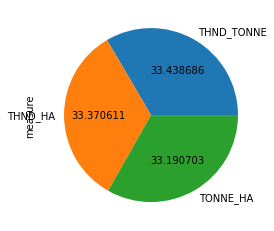

In [23]:
new_df['measure'].value_counts().plot(kind='pie',autopct='%2f')

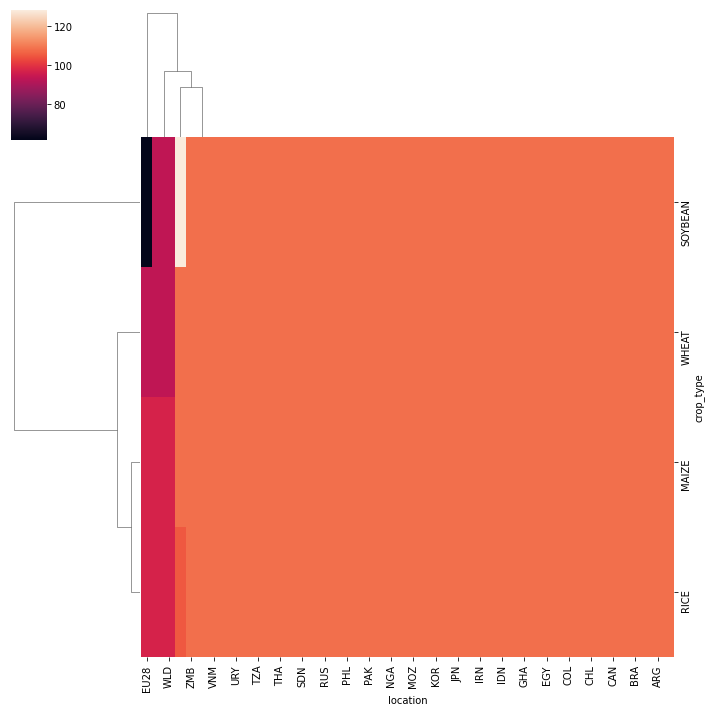

In [24]:
sns.clustermap(pd.crosstab(new_df['crop_type'],new_df['location']))

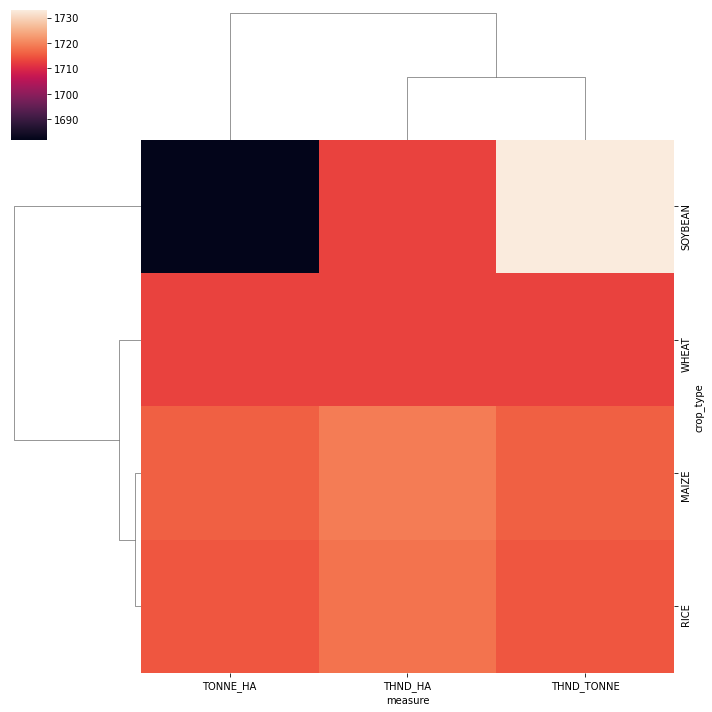

In [25]:
sns.clustermap(pd.crosstab(new_df['crop_type'],new_df['measure']))

C:\Users\Pooja Khande\anaconda3\envs\Data science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

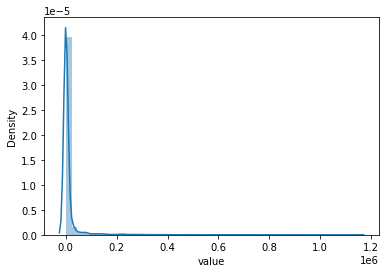

In [26]:
sns.distplot(new_df['value'])

<AxesSubplot:title={'center':'crop cost'}, xlabel='value', ylabel='crop_type'>

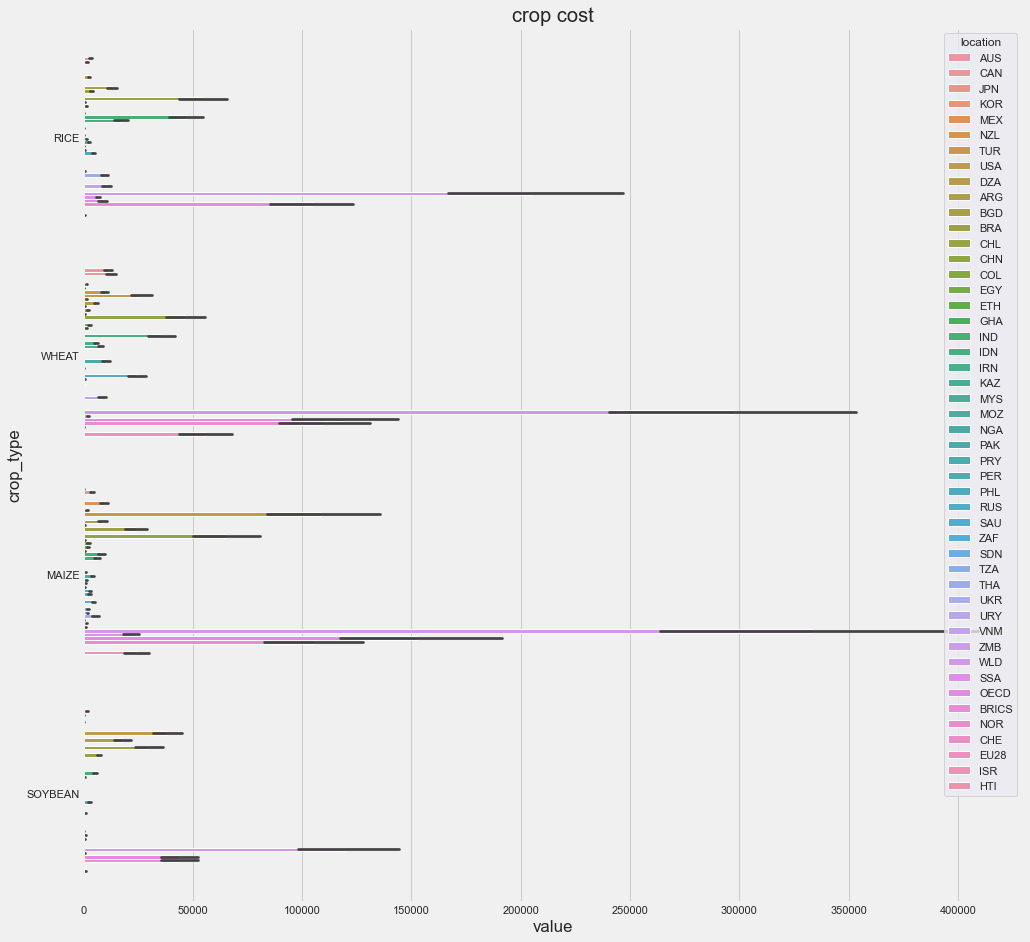

In [41]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,15))
plt.title("crop cost")
sns.set(font_scale=1)
sns.barplot(data=new_df, x="value", y="crop_type",hue="location")

<AxesSubplot:title={'center':'Crop measure'}, xlabel='value', ylabel='crop_type'>

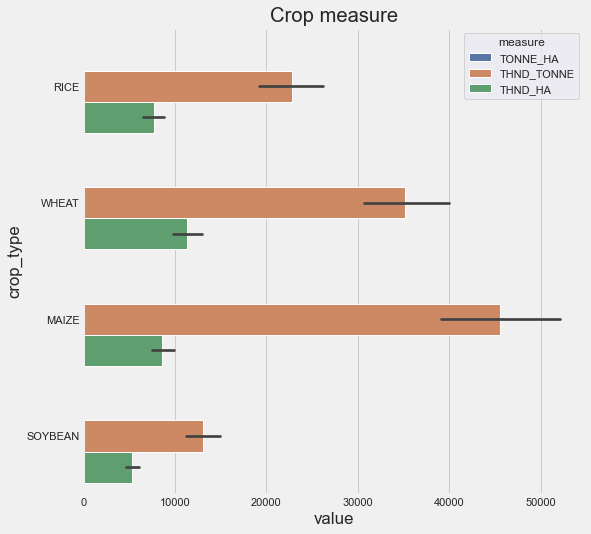

In [42]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
plt.title("Crop measure")
sns.set(font_scale=1)
sns.barplot(data=new_df, x="value", y="crop_type",hue="measure")